# Capstone Project 2: Recommender System


## Exploratory Data Analysis
With a cleaned and prepared dataset exploratory data analysis (EDA) can be performed to see if there are any potential trends or relationships within the data. The EDA will provide the foundation for deeper analysis as well as assist in discovering potential relationships or insights from the data.   

The dataset will first be loaded and observed using similar steps performed in the data cleaning/wrangling.

In [1]:
#importing relevant packages and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting default plot settings
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

In [3]:
#accessing the local directory for the data
PATH = os.path.join(os.environ['HOMEPATH'], 'data', 'amazon_cleaned.csv')
df = pd.read_csv(PATH, index_col=0)

C:\Users\Thompson\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.head()

,itemID,rating,reviewText,reviewTime,reviewerID,summary,foundHelpful,totalHelpful
0,0528881469,5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,Gotta have GPS!,0,0
1,0528881469,1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Very Disappointed,12,15
2,0528881469,3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,1st impression,43,45
3,0528881469,2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Great grafics, POOR GPS",9,10
4,0528881469,1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,"Major issues, only excuses for support",0,0


### Average Ratings for Item
The first area of interest to explore is the rating column. This column is the rating that each reviewer gives the item. A subset of the data containing only the itemID and the rating will be created.The dataset will be grouped up by itemID and the average ratings will be aggregated. A histrogram of the average rating for each item will be created to visualize the distribution of ratings that items tend to receive.

In [5]:
#creating subset of the data
df_item_rating = df[['itemID', 'rating']].copy()

#grouping the data by itemID and aggregating on the average rating
item_rating = df_item_rating.groupby('itemID').agg(np.mean)

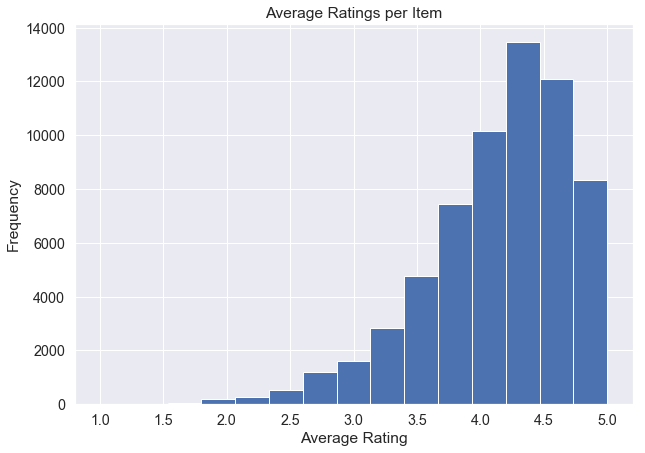

In [6]:
plt.title('Average Ratings per Item')
plt.ylabel('Frequency')
plt.xlabel('Average Rating')

plt.hist(item_rating['rating'], bins=15)
plt.show()

The histogram above shows the average ratings that items receive tend to be on the higher end of the scale, about 4.30. There is also a decent amount of items with very high scores, seen in the last bin of the histogram. It appears that it is quite rare to see items with average scores below a 3. 

### Count of Ratings per Items
Next, the count of ratings for each item will be observed. A histogram of the count of reviews per item will be made. In order to do this the itemIDs will be grouped up and then aggregated by the count.

In [7]:
#creating count column
rating_count = df_item_rating.groupby('itemID').count().rename(columns={'rating':'count'})
rating_count.head()

,count
itemID,
0528881469,5
0594451647,5
0594481813,8
0972683275,219
1400501466,43


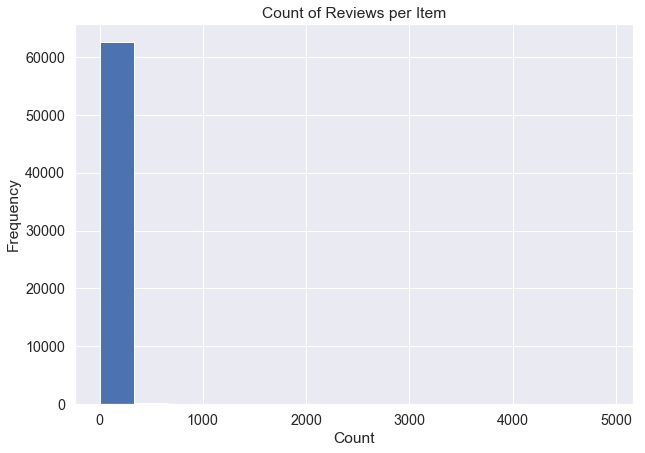

In [8]:
#plotting a histogram of ratings counts per item
plt.title('Count of Reviews per Item')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.hist(rating_count['count'], bins = 15)
plt.show()

It is very apparent that a large majority of items receive relatively low amounts of reviews. Perfoming a pandas describe method will provide summary statistics of the count column.

In [9]:
rating_count.describe()

,count
count,63001.000000
mean,26.812082
std,75.821107
min,5.000000
25%,7.000000
50%,11.000000
75%,22.000000
max,4915.000000


The describe method shows that 75% of all the items in this data set receive at most 22 reviews, but the largest amount of reviews that an item had received is 4915.

### Average Ratings per Reviewer
Observing how each reviewer tends to rate items may provide some insights. The subset of the data containing only the reviewers and the ratings will be created.

In [10]:
#creating subset of the original data
df_reviewer_rating = df[['reviewerID', 'rating']]

In [11]:
#grouping by average ratings for each reviewer
reviewer_rating = df_reviewer_rating.groupby('reviewerID').agg(np.mean)

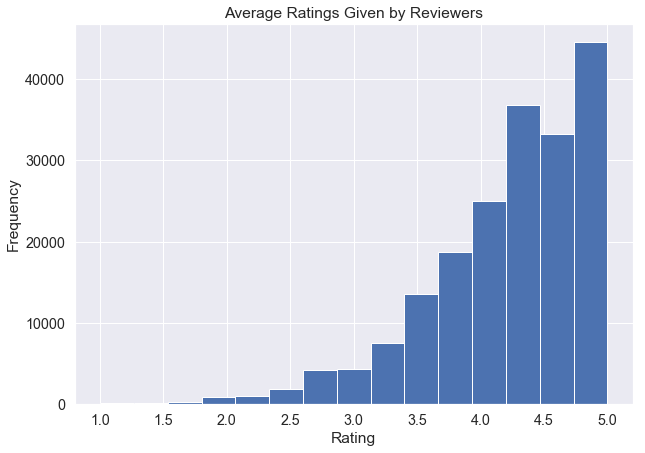

In [12]:
plt.title('Average Ratings Given by Reviewers')
plt.ylabel('Frequency')
plt.xlabel('Rating')

plt.hist(reviewer_rating['rating'], bins=15)
plt.show()

Similar to the reviews that items tend to receive, reviewers tend to give items higher ratings. It also look like most reviewers give very high ratings, on average.

### Number of Items Rated by Reviewers
The amount of items that reviewers tend to give reviews to will also be observed. This will be done by grouping up the reviewers and aggregating the count of ratings they have given.

In [13]:
#grouping up reviewers, aggregating on the count of ratings given
item_count = df_reviewer_rating.groupby('reviewerID').count().rename(columns={'rating':'count'})
item_count.head()

,count
reviewerID,
A000715434M800HLCENK9,5
A00101847G3FJTWYGNQA,6
A00166281YWM98A3SVD55,5
A0046696382DWIPVIWO0K,5
A00472881KT6WR48K907X,7


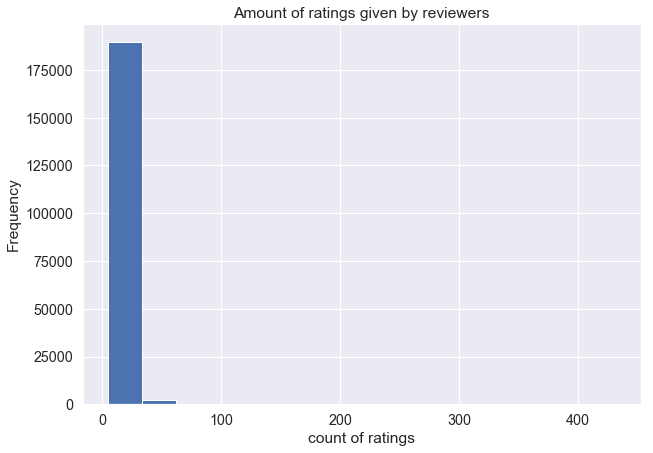

In [14]:
#creating histogram for reviewer rating amounts
plt.title('Amount of ratings given by reviewers')
plt.xlabel('count of ratings')
plt.ylabel('Frequency')

plt.hist(item_count['count'], bins=15)
plt.show()

Once again, the results of this histogram is similar to what was seen for item rating amounts. There are very many reviewers with low amount of reviews and very little with large amount of reviews. The describe method will be performed to see how the data is distributed.

In [15]:
item_count.describe()

,count
count,192403.000000
mean,8.779427
std,8.263942
min,5.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,431.000000


With about 192,000 reviewers, 75% of them have less than 9 ratings given. The most amount of ratings given is 431.

### Average Yearly Ratings
A visualization will be made for the average ratings that are given yearly. The DataFrame with the relevant columns, reviewTime and rating, will be created and the time data will be set as the index.

In [16]:
df_time_rating = df[['reviewTime','rating']].set_index('reviewTime')
df_time_rating.head()

,rating
reviewTime,
2013-06-02,5
2010-11-25,1
2010-09-09,3
2010-11-24,2
2011-09-29,1


In order to group the ratings be yearly averages, the index needs to be converted into a datetime data type. It is currently an object data type.

In [17]:
#need to convert index into date time, right now it is an object dtype
df_time_rating.index

Index(['2013-06-02', '2010-11-25', '2010-09-09', '2010-11-24', '2011-09-29',
       '2014-01-03', '2014-04-27', '2014-05-04', '2014-07-11', '2014-01-20',
       ...
       '2014-07-22', '2014-07-10', '2014-07-07', '2014-07-14', '2014-07-16',
       '2014-07-17', '2014-07-15', '2014-07-17', '2014-07-18', '2014-07-13'],
      dtype='object', name='reviewTime', length=1689188)

Pandas provides a method for converting to a datetime data type. This method will be performed on the DataFrame's index. Then the data can be grouped by years with the datetime resample method. This method takes an argument that specifies the time to group by. The ratings will be aggregated by the average. With this, a plot of yearly averages can be visualized.

In [18]:
#converting the index into a datetime
df_time_rating.index = pd.to_datetime(df_time_rating.index)

In [19]:
#the dataset will be grouped by yearly averages
yearly_ratings = df_time_rating.resample('1y').mean()
yearly_ratings

,rating
reviewTime,
1999-12-31,4.388889
2000-12-31,4.321909
2001-12-31,4.187694
2002-12-31,4.110151
2003-12-31,4.014378
2004-12-31,3.876139
2005-12-31,3.913986
2006-12-31,3.989448
2007-12-31,4.140566


C:\Users\Thompson\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


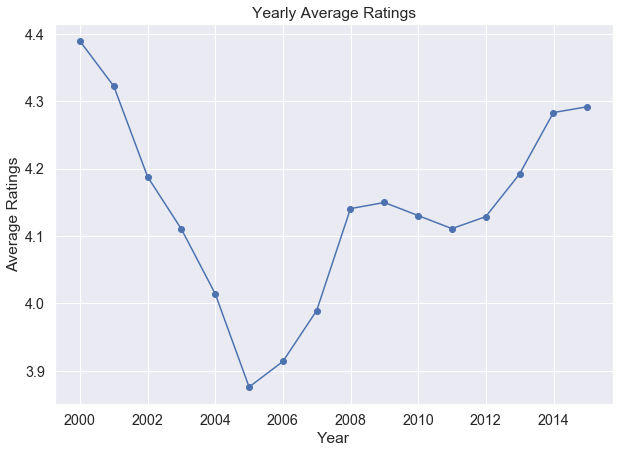

In [20]:
#plot the yearly averages
plt.title('Yearly Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Ratings')

plt.plot(yearly_ratings, marker='o')
plt.show()

The ratings were on average the highest in the early years of 2000-2001. Then there was a sharp drop in average ratings with the all time low in 2005. The ratings then start to spike up until 2008, where it looks to stay relatively stable for about 4 years. Finally, it looks like the average ratings start to ascend up until the end of this dataset in July 2014. 

### Yearly Amount of Ratings
Following the average rating scores, the amount of ratings given, yearly, will also be observed. This time instead of aggregating on average ratings, the ratings will be aggregated by count and visualized in a line plot.

In [21]:
#grouping by yearly counts of ratings
yearly_counts = df_time_rating.resample('1y').count()

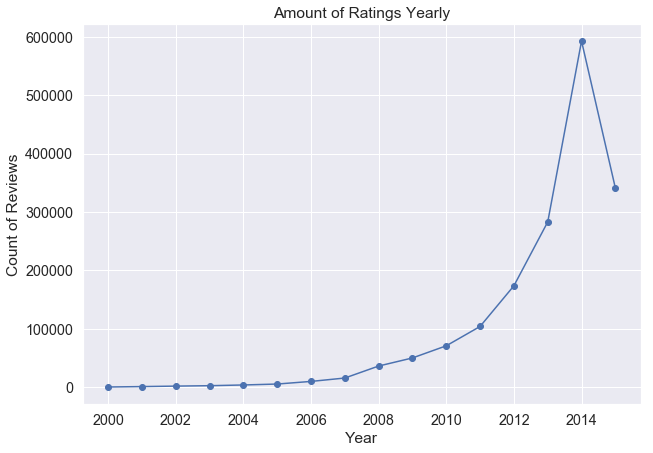

In [22]:
#plotting yearly counts
plt.title('Amount of Ratings Yearly')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')

plt.plot(yearly_counts, marker='o')
plt.show()

It looks like there is an exponential increase in the total amount of ratings given, yearly. The drop after 2014 is expected because the dataset only includes data up to July 2014.

### Amount of Unique Items Yearly
The amount of unique items and reviewers will be observed, yearly. To do this a function will be created. The function will take a pandas DataFrame and the columns of interest and return a DataFrame grouped by unique values by year. 

In [23]:
#defining function to create a yearly dataset of counts
def uniqueYearly(data, group_column, date_column, period='1y'):
    """
    Summary
        Returns the count of unique values in the given column by a default of yearly.
        
    Parameters
        data: the pandas DataFrame that contains the relevant columns
        group_column: the column to group by unique values
        date_column: the column containing the dates
        period: default of 1 year, can change to any time period (ex. 1d for 1 day, 1m for 1 month) 
    
    """
    df = data[[date_column, group_column]]
    #grouping by unique values with min year
    counts = df.groupby(group_column).min()
    #setting date as the index
    counts.reset_index(inplace=True)
    counts.set_index(date_column, inplace=True)
    #converting the time index into a datetime data type
    counts.index = pd.to_datetime(counts.index)
    #grouping the data by yearly counts
    counts_yearly = counts.resample(period).count()
    #renaming the column
    counts_yearly.rename(columns={group_column:group_column + '_counts'}, inplace=True)
    #returning the data grouped by year, renaming the column
    return counts_yearly

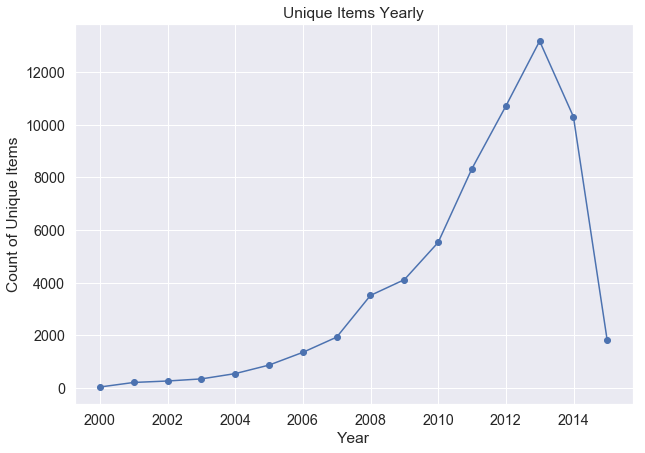

In [24]:
#getting count of unique items, yearly
items_yearly = uniqueYearly(df, 'itemID', 'reviewTime')

#plotting yearly unique items
plt.title('Unique Items Yearly')
plt.xlabel('Year')
plt.ylabel('Count of Unique Items')

plt.plot(items_yearly, marker='o')
plt.show()

This plot shows that there is an exponential increase in unique items every year. It also shows an interestingly quick increase from 2007 to 2008. The slope from 2010 and on seems to be steadily increasing at a constant rate. Similar to the previous time series plots, the drop in 2014 is due to the fact that the dataset ends in July 2014.

### Amount of New Reviewers Yearly

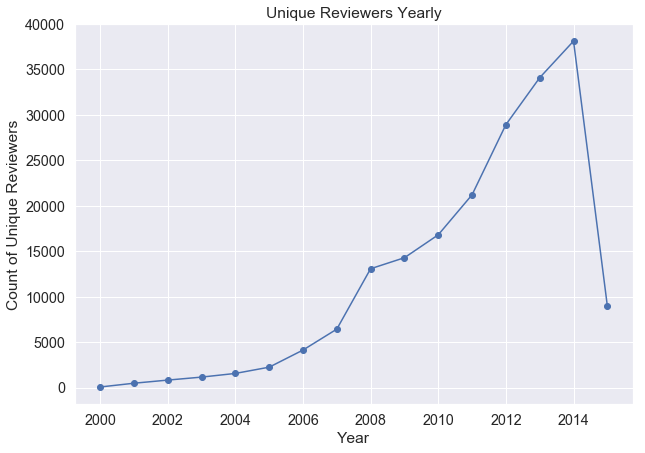

In [25]:
#getting count of unique reviewers, yearly
reviewers_yearly = uniqueYearly(df,'reviewerID','reviewTime')

#plotting yearly unique reviewers
plt.title('Unique Reviewers Yearly')
plt.xlabel('Year')
plt.ylabel('Count of Unique Reviewers')

plt.plot(reviewers_yearly, marker='o')
plt.show()

This plot is very similar to the unique items yearly plot. The same spike from 2007 to 2008 can be seen. However, the data from 2011 and on show signs of decreasing in the rate of change.

## Summary
After performing the initial exploratory data analysis and creating visualizations, there were some interesting observations made. Both items and reviewers tend to receive and give relatively high ratings; A majority of the ratings ranged from 4 to 5. It was also seen that most of the dataset contained items that had received about 5-22 reviews with the highest amount of reviews received being 4915. Similarly, the amount of reviews given by reviewers ranged from about 5-9 with a max of 431.  

Looking at some time series plots, another observation that was made was that the overall average of ratings given or received yearly started out high and dropped very sharply up until 2005. It then sharply increased until 2008 where it stayed relatively stable for 4 years. The average ratings starts to increase from 2012 onwards. This plot will be analyzed a little more deeply in the next part of this project.  

The last 3 time series plots of amount of ratings yearly, unique items yearly, and unique reviewers yearly show exponential increases over time. All three of these plots also show a spike that occurs from 2007 to 2008. This is another observation that could be given a deeper analysis.